In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

df = pd.read_csv('/content/dataset01.zip')
print(df.head())


   Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34               

In [ ]:

print(df.isnull().sum())


df = df.dropna()


Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


In [ ]:

features = ['Years_At_Company', 'Monthly_Salary', 'Work_Hours_Per_Week']
target = 'Performance_Score'

X = df[features]
y = df[target]

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest - RMSE:", rf_rmse)
print("Random Forest - R2 Score:", rf_r2)


Random Forest - RMSE: 0.3995422202809074
Random Forest - R2 Score: 0.9203812958966966


In [ ]:

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_r2 = r2_score(y_test, xgb_preds)

print("XGBoost - RMSE:", xgb_rmse)
print("XGBoost - R2 Score:", xgb_r2)


XGBoost - RMSE: 0.38874248840826975
XGBoost - R2 Score: 0.9246273636817932


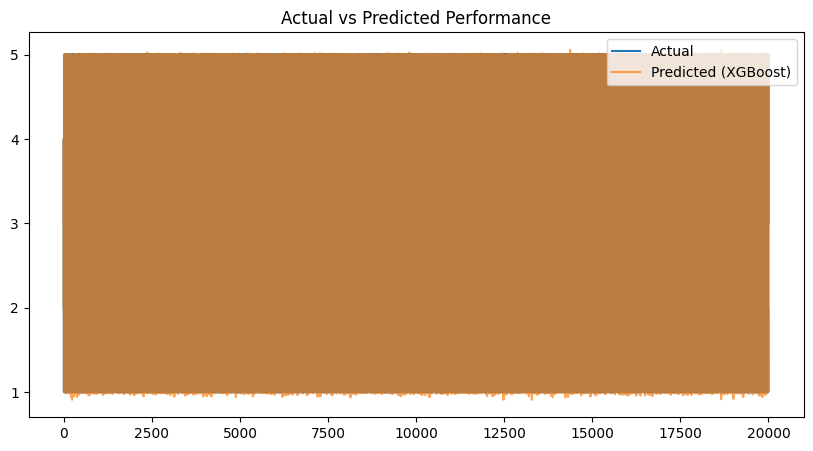

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(xgb_preds, label='Predicted (XGBoost)', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Performance")
plt.show()


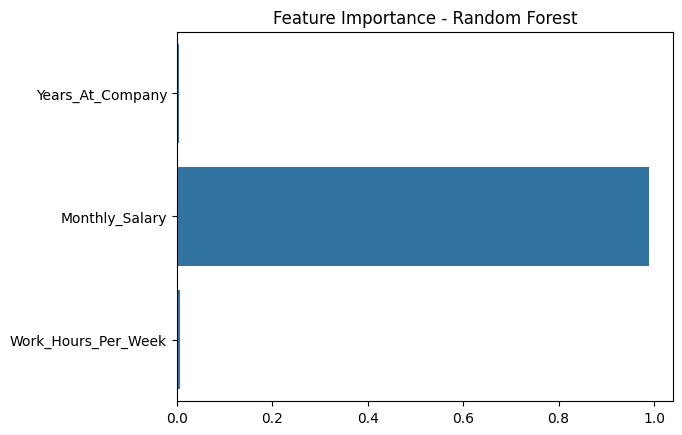

In [ ]:
importances = rf_model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - Random Forest")
plt.show()


In [ ]:

import numpy as np
df['rating'] = np.random.randint(1, 6, size=len(df))
